In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_excel("data.xlsx")
df

,Year,Month,temp
0,2000,Jan,-2.11
1,2000,Feb,-0.02
2,2000,Mar,3.36
3,2000,Apr,11.68
4,2000,May,14.62
...,...,...,...
259,2021,Aug,23.83
260,2021,Sep,18.63
261,2021,Oct,13.31
262,2021,Nov,9.16


In [ ]:
# Step 1: Convert 'Year' and 'Month' to datetime
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'] + '-01')
# Set Date as index
df.set_index('Date', inplace=True)
df = df.sort_index()
df

,Year,Month,temp
Date,,,
2000-01-01,2000,Jan,-2.11
2000-02-01,2000,Feb,-0.02
2000-03-01,2000,Mar,3.36
2000-04-01,2000,Apr,11.68
2000-05-01,2000,May,14.62
...,...,...,...
2021-08-01,2021,Aug,23.83
2021-09-01,2021,Sep,18.63
2021-10-01,2021,Oct,13.31


In [ ]:
# Ensure proper frequency
df = df.asfreq('MS')  # 'MS' = Month Start



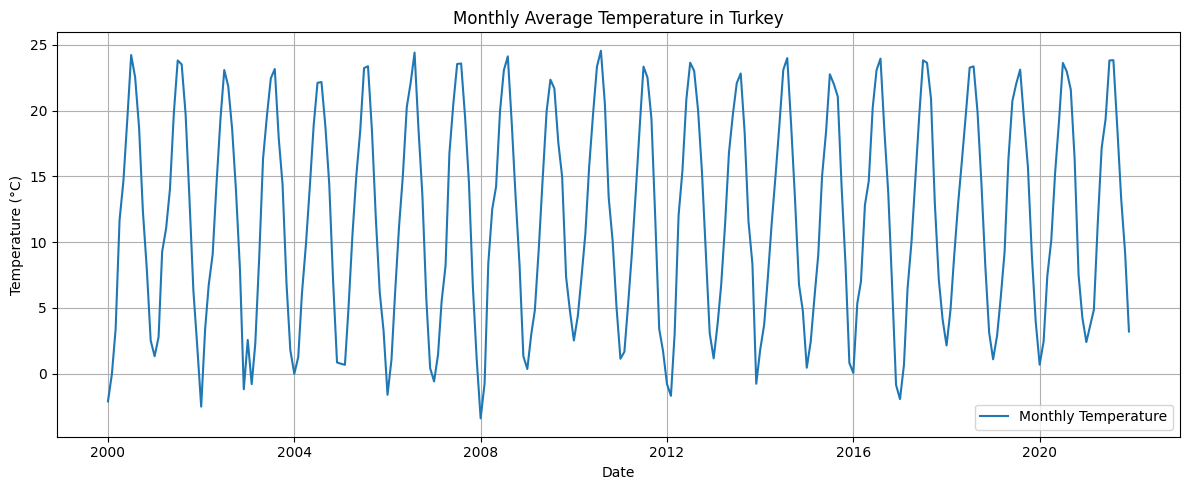

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['temp'], label='Monthly Temperature', color='tab:blue')
plt.title("Monthly Average Temperature in Turkey")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

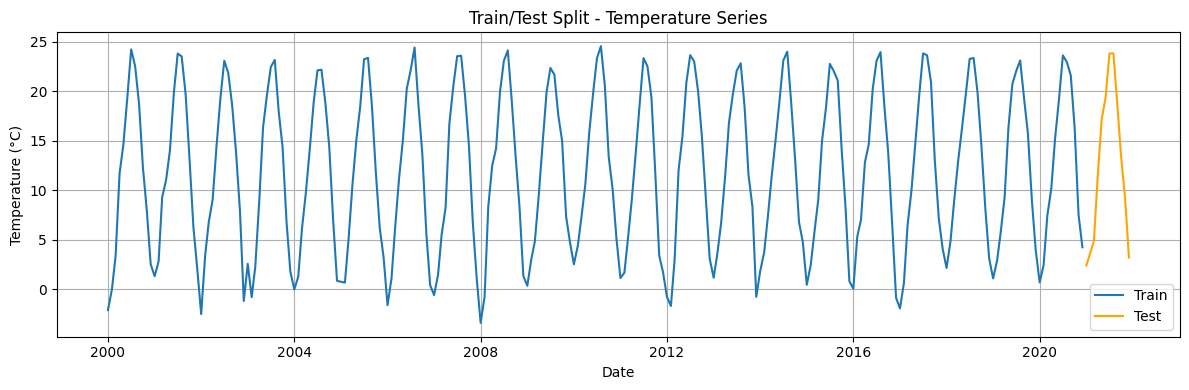

(252, 12)

In [ ]:
# Split the dataset: last 12 months as test, the rest as train
train = df.iloc[:-12].copy()
test = df.iloc[-12:].copy()

# Check shapes
train_shape = train.shape[0]
test_shape = test.shape[0]

# Plot the train and test series
plt.figure(figsize=(12, 4))
plt.plot(train.index, train['temp'], label='Train')
plt.plot(test.index, test['temp'], label='Test', color='orange')
plt.title('Train/Test Split - Temperature Series')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

(train_shape, test_shape)


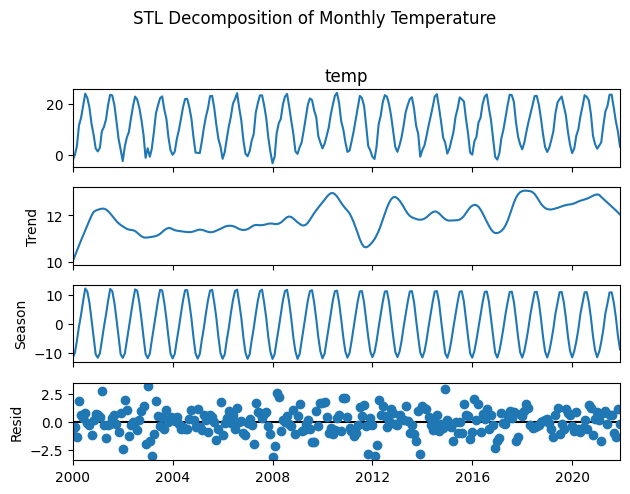

{'ADF Statistic': -3.7506950244622543,
 'p-value': 0.003454028232732562,
 'Used Lags': 14,
 'Number of Observations': 237}

In [ ]:
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller

# Perform STL decomposition
stl = STL(df['temp'], seasonal=13)
res = stl.fit()

# Plot the decomposition
res.plot()
plt.suptitle("STL Decomposition of Monthly Temperature", y=1.02)
plt.tight_layout()
plt.show()

# ADF test for stationarity
adf_result = adfuller(train['temp'].dropna())
adf_output = {
    'ADF Statistic': adf_result[0],
    'p-value': adf_result[1],
    'Used Lags': adf_result[2],
    'Number of Observations': adf_result[3]
}
adf_output


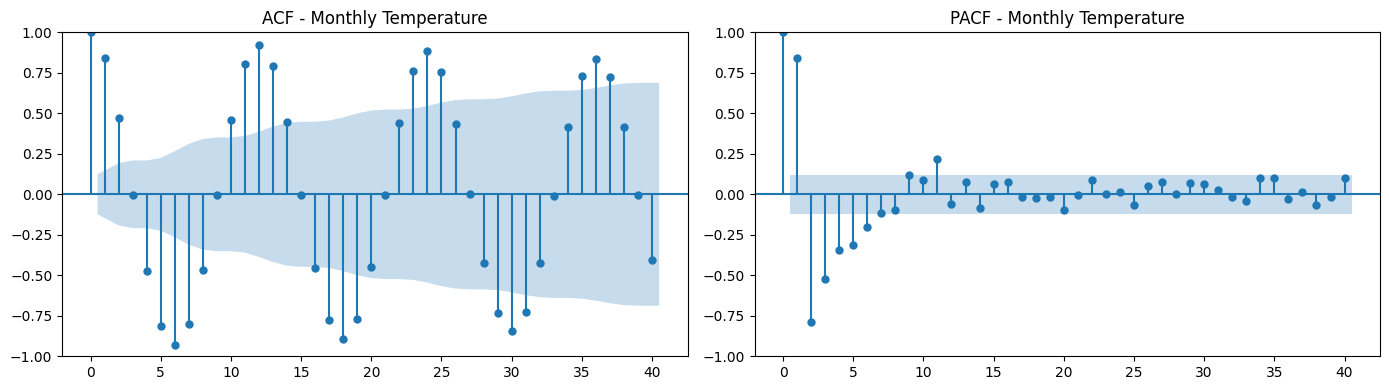

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
plot_acf(train['temp'].dropna(), lags=40, ax=axes[0])
axes[0].set_title('ACF - Monthly Temperature')
plot_pacf(df['temp'].dropna(), lags=40, ax=axes[1])
axes[1].set_title('PACF - Monthly Temperature')
plt.tight_layout()
plt.show()


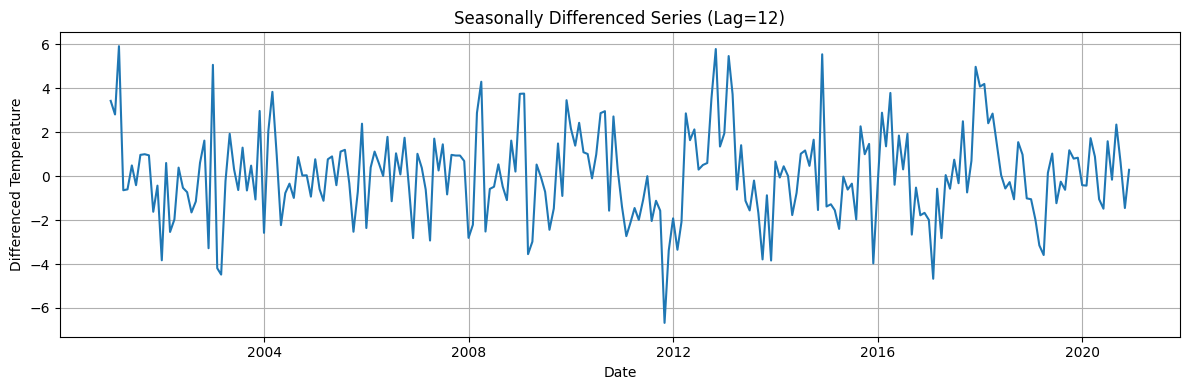

{'ADF Statistic': -6.280969109551979,
 'p-value': 3.797412273020284e-08,
 'Used Lags': 12,
 'Number of Observations': 227}

In [ ]:
# Apply seasonal differencing with lag 12
train['temp_seasonal_diff'] = train['temp'] - train['temp'].shift(12)
train_seasonal_diff = train['temp_seasonal_diff'].dropna()

# Plot the seasonally differenced series
plt.figure(figsize=(12, 4))
plt.plot(train_seasonal_diff)
plt.title('Seasonally Differenced Series (Lag=12)')
plt.xlabel('Date')
plt.ylabel('Differenced Temperature')
plt.grid(True)
plt.tight_layout()
plt.show()

# ADF test on the seasonally differenced series
adf_seasonal = adfuller(train_seasonal_diff)
adf_seasonal_output = {
    'ADF Statistic': adf_seasonal[0],
    'p-value': adf_seasonal[1],
    'Used Lags': adf_seasonal[2],
    'Number of Observations': adf_seasonal[3]
}
adf_seasonal_output


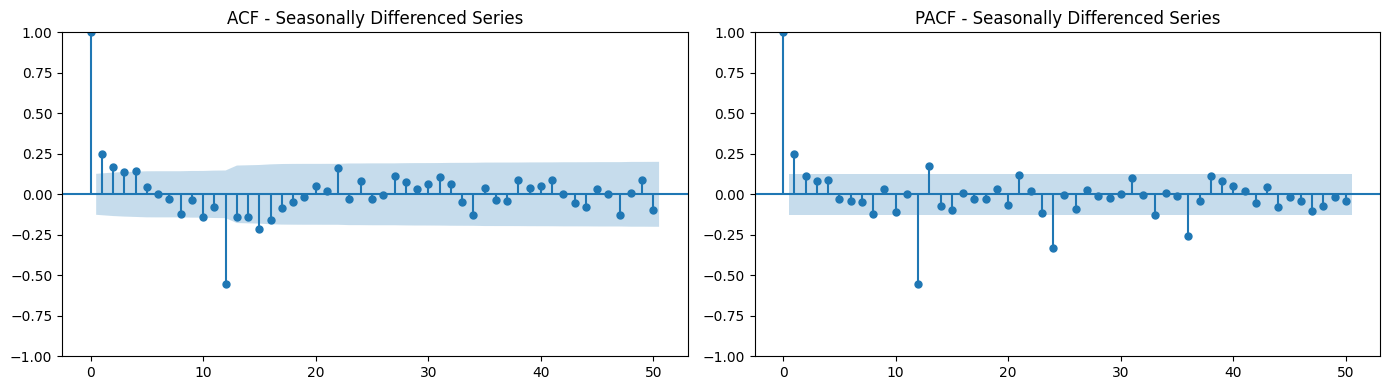

In [ ]:
# ACF and PACF for seasonally differenced series
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
plot_acf(train_seasonal_diff, lags=50, ax=axes[0])
axes[0].set_title('ACF - Seasonally Differenced Series')
plot_pacf(train_seasonal_diff, lags=50, ax=axes[1])
axes[1].set_title('PACF - Seasonally Differenced Series')
plt.tight_layout()
plt.show()


In [ ]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 33.3 MB/s eta 0:00:00


In [ ]:
# Uninstall potentially conflicting versions
!pip uninstall -y pmdarima numpy

# Install a specific NumPy version
!pip install numpy==1.26.4

# Install pmdarima (it should now use the installed numpy 1.26.4)
!pip install pmdarima

# IMPORTANT: After running this cell, go to the menu "Runtime" -> "Restart runtime".
#    Do NOT run your import code cell until AFTER restarting.

Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 89.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
  Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.2 MB)


In [ ]:
from pmdarima import auto_arima

auto_model = auto_arima(train['temp'],
                        seasonal=True,
                        m=12,
                        d=0,
                        D=1,
                        trace=True,
                        stepwise=True,
                        suppress_warnings=True,
                        error_action='ignore')

auto_model.summary()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=3.90 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1029.323, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=917.049, Time=0.40 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.60 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1027.588, Time=0.05 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1015.703, Time=0.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=885.635, Time=0.98 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=6.27 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=2.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=907.899, Time=0.73 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=887.635, Time=1.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=887.635, Time=1.64 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=887.178, Time=0.89 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=inf, Time=7.49 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,1,0)[12]             : AIC=884.368, Time=0.36 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,1,0)[12]             : AIC=915.325, Time=0.21 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,1,1)[12]             : AIC=844.931, Time=1.40 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,1,1)[12]             : AIC=inf, Time=0.63 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,1,2)[12]             : AIC=inf, Time=1.62 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,1,2)[12]             : AIC=844.853, Time=2.50 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,1,2)[12]             : AIC=842.857, Time=1.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,1,1)[12]             : AIC=inf, Time=2.70 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,1,2)[12]             : AIC=866.773, Time=1.22 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,1,2)[12]             : AIC=843.794, Time=1.40 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,1,2)[12]             : AIC=inf, Time=1.89 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,1,2)[12]             : AIC=847.036, Time=1.01 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,1,2)[12]             : AIC=inf, Time=5.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=inf, Time=6.30 sec

Best model:  ARIMA(1,0,0)(0,1,2)[12]          
Total fit time: 54.647 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  252
Model:             SARIMAX(1, 0, 0)x(0, 1, [1, 2], 12)   Log Likelihood                -417.429
Date:                                 Sun, 18 May 2025   AIC                            842.857
Time:                                         05:32:05   BIC                            856.780
Sample:                                     01-01-2000   HQIC                           848.467
                                          - 12-01-2020                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3294      0.052      6.350      0.000       0.228       0.431
ma.S.L12      -1.1100      0.068    -16.352      0.000      -1.243      -0.977
ma.S.L24       0.2121      0.064      3.300      0.001       0.086       0.338
sigma2         1.7238      0.146     11.769      0.000       1.437       2.011
===================================================================================
Ljung-Box (L1) (Q):                   0.48   Jarque-Bera (JB):                 3.11
Prob(Q):                              0.49   Prob(JB):                         0.21
Heteroskedasticity (H):               0.80   Skew:                             0.05
Prob(H) (two-sided):                  0.32   Kurtosis:                         3.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
import statsmodels.api as sm

model = sm.tsa.SARIMAX(train['temp'],
                       order=(1, 0, 1),
                       seasonal_order=(3, 1, 1, 12),
                       enforce_stationarity=False,
                       enforce_invertibility=False)

result = model.fit(disp=False)
print(result.summary())


                                     SARIMAX Results                                      
Dep. Variable:                               temp   No. Observations:                  252
Model:             SARIMAX(1, 0, 1)x(3, 1, 1, 12)   Log Likelihood                -342.805
Date:                            Sun, 18 May 2025   AIC                            699.610
Time:                                    05:38:37   BIC                            722.803
Sample:                                01-01-2000   HQIC                           708.993
                                     - 12-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4366      0.161      2.705      0.007       0.120       0.753
ma.L1         -0.0757      0.173   

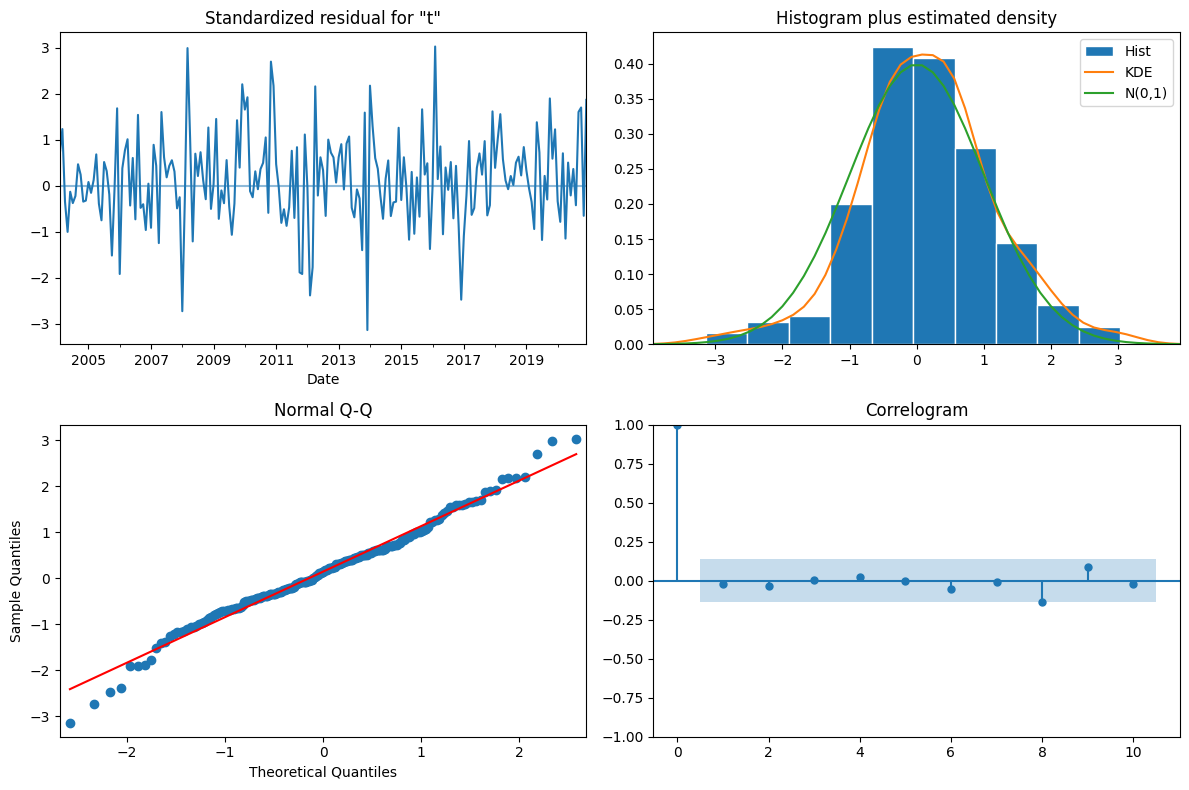

In [ ]:
result.plot_diagnostics(figsize=(12, 8))
plt.tight_layout()
plt.show()

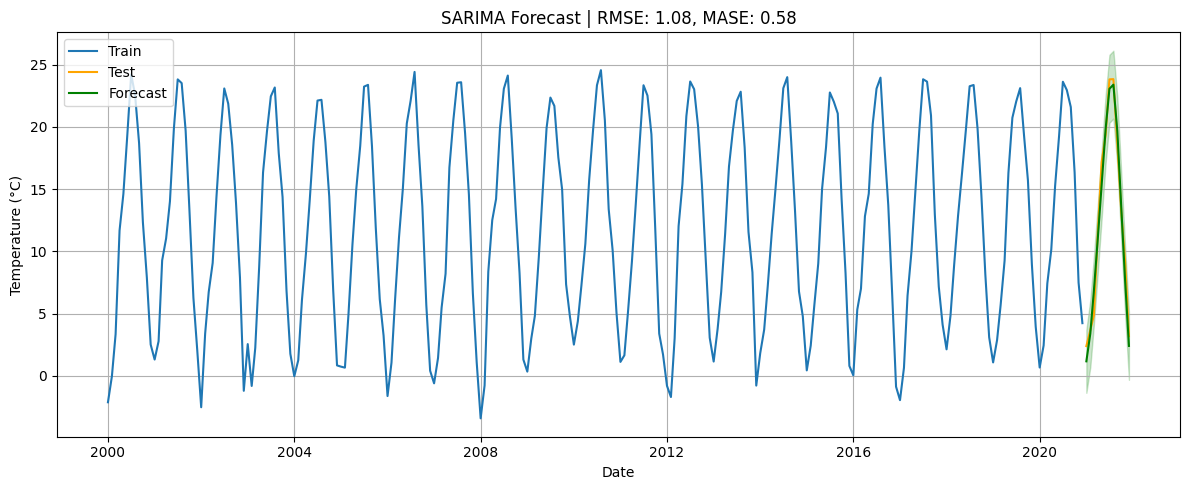

RMSE: 1.0802
MASE: 0.5825


In [ ]:
# Forecast 12 steps ahead
forecast = result.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# RMSE
rmse = np.sqrt(mean_squared_error(test['temp'], forecast_mean))

# MASE calculation
naive_forecast = train['temp'].shift(12)
mase_denominator = np.mean(np.abs(train['temp'][12:] - naive_forecast[12:]))
mase = np.mean(np.abs(test['temp'] - forecast_mean)) / mase_denominator

# Plot
plt.figure(figsize=(12, 5))
plt.plot(train.index, train['temp'], label='Train')
plt.plot(test.index, test['temp'], label='Test', color='orange')
plt.plot(test.index, forecast_mean, label='Forecast', color='green')
plt.fill_between(test.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1],
                 color='green', alpha=0.2)
plt.title(f'SARIMA Forecast | RMSE: {rmse:.2f}, MASE: {mase:.2f}')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print error metrics
print(f"RMSE: {rmse:.4f}")
print(f"MASE: {mase:.4f}")

In [ ]:
df_fe = df.copy()

# Feature Engineering on full data (so test lags are computable)
df_fe['lag_1'] = df_fe['temp'].shift(1)
df_fe['lag_12'] = df_fe['temp'].shift(12)
df_fe['roll_mean_3'] = df_fe['temp'].rolling(window=3).mean()
df_fe['roll_std_3'] = df_fe['temp'].rolling(window=3).std()
df_fe['roll_mean_12'] = df_fe['temp'].rolling(window=12).mean()
df_fe['month'] = df_fe.index.month
df_fe['quarter'] = df_fe.index.quarter
df_fe['year'] = df_fe.index.year

# Drop rows with NaN (caused by shifts and rolling)
df_fe.dropna(inplace=True)

# Redefine train/test split
train_ml = df_fe.iloc[:-12].copy()
test_ml = df_fe.iloc[-12:].copy()


In [ ]:
train_ml

,Year,Month,temp,lag_1,lag_12,roll_mean_3,roll_std_3,roll_mean_12,month,quarter,year
Date,,,,,,,,,,,
2001-01-01,2001,Jan,1.32,2.52,-2.11,3.913333,3.504302,11.545833,1,1,2001
2001-02-01,2001,Feb,2.79,1.32,-0.02,2.210000,0.782496,11.780000,2,1,2001
2001-03-01,2001,Mar,9.28,2.79,3.36,4.463333,4.235615,12.273333,3,1,2001
2001-04-01,2001,Apr,11.04,9.28,11.68,7.703333,4.345116,12.220000,4,2,2001
2001-05-01,2001,May,14.02,11.04,14.62,11.446667,2.396024,12.170000,5,2,2001
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,2020,Aug,22.95,23.62,23.11,21.940000,2.353572,12.468333,8,3,2020
2020-09-01,2020,Sep,21.59,22.95,19.24,22.720000,1.034360,12.664167,9,3,2020
2020-10-01,2020,Oct,16.34,21.59,15.70,20.293333,3.490563,12.717500,10,4,2020


In [ ]:
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.neural_network import MLPRegressor
import numpy as np
import pandas as pd

# Prepare data
features = ['lag_1', 'lag_12', 'roll_mean_3', 'roll_std_3', 'roll_mean_12', 'month', 'quarter', 'year']
target = 'temp'
X_train = train_ml[features]
y_train = train_ml[target]
X_test = test_ml[features]
y_test = test_ml[target]

# Scale where needed
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Scoring and splitting
rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False, squared=False)
tscv = TimeSeriesSplit(n_splits=5)

# Models and hyperparameter grids
models = {
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "HistGB": HistGradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42),
    "SVR": SVR(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "MLP": MLPRegressor(max_iter=1000, random_state=42)
}

param_grids = {
    "RandomForest": {"n_estimators": [100, 150, 200],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 3, 5]
    },
    "GradientBoosting": {
        "n_estimators": [100, 200, 300],
        "learning_rate": [0.01, 0.05, 0.1],
        "max_depth": [3, 5, 7]
    },
    "HistGB": {
        "learning_rate": [0.01, 0.05, 0.1],
        "max_iter": [100, 200, 300],
        "max_depth": [None, 10, 20]
    },
    "XGBoost": {
        "n_estimators": [100, 200, 300],
        "learning_rate": [0.01, 0.05, 0.1],
        "max_depth": [3, 5, 7],
        "subsample": [0.7, 0.9, 1.0],
        "colsample_bytree": [0.7, 1.0]
    },
    "LightGBM": {
        "n_estimators": [100, 200, 300],
        "learning_rate": [0.01, 0.05, 0.1],
        "max_depth": [-1, 5, 10],
        "num_leaves": [31, 50, 100],
        "subsample": [0.7, 1.0]
    },
    "SVR": {
        "C": [0.1, 1, 10, 100],
        "epsilon": [0.001, 0.01, 0.1],
        "kernel": ["rbf", "linear"]
    },
    "Ridge": {
        "alpha": [0.1, 1, 10, 100, 1000]
    },
    "Lasso": {
        "alpha": [0.0001, 0.001, 0.01, 0.1, 1]
    },
    "ElasticNet": {
        "alpha": [0.001, 0.01, 0.1, 1],
        "l1_ratio": [0.1, 0.5, 0.9]
    },
    "MLP": {
        "hidden_layer_sizes": [(50,), (100,), (50, 50)],
        "alpha": [0.0001, 0.001, 0.01],
        "activation": ["relu", "tanh"]
    }
}

# Training and evaluation
results = []
for name in models:
    model = models[name]
    param_grid = param_grids[name]

    # Use proper data for each model type
    X_tr = X_train_scaled if name in ["SVR", "MLP", "Ridge", "Lasso", "ElasticNet"] else X_train
    X_te = X_test_scaled if name in ["SVR", "MLP", "Ridge", "Lasso", "ElasticNet"] else X_test

    # Use RandomizedSearchCV instead of GridSearchCV
    search = RandomizedSearchCV(
        model,
        param_grid,
        cv=tscv,
        scoring="neg_mean_absolute_error",
        n_iter=5,
        n_jobs=-1,
        random_state=42,
        verbose=0
    )
    search.fit(X_tr, y_train)

    best_model = search.best_estimator_
    preds = best_model.predict(X_te)
    rmse = np.sqrt(mean_squared_error(y_test, preds))

    # Calculate MASE like in the first example (seasonal naive)
    naive_forecast = y_train.shift(12)
    mase_denominator = np.mean(np.abs(y_train[12:] - naive_forecast[12:]))
    mase = np.mean(np.abs(y_test - preds)) / mase_denominator

    results.append({
        'Model': name,
        'Best Params': search.best_params_,
        'RMSE': round(rmse, 4),
        'MASE': round(mase, 4)
    })

# Output results
results_df = pd.DataFrame(results)
print(results_df)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 442
[LightGBM] [Info] Number of data points in the train set: 240, number of used features: 8
[LightGBM] [Info] Start training from score 11.895625
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Sort results by RMSE (ascending)
results_df = results_df.sort_values(by='RMSE')

results_df

,Model,Best Params,RMSE,MASE
9,MLP,"{'hidden_layer_sizes': (50, 50), 'alpha': 0.01...",0.7719,0.3863
5,SVR,"{'kernel': 'rbf', 'epsilon': 0.001, 'C': 100}",0.8009,0.4215
4,LightGBM,"{'subsample': 0.7, 'num_leaves': 50, 'n_estima...",1.2093,0.6373
3,XGBoost,"{'subsample': 0.9, 'n_estimators': 100, 'max_d...",1.3679,0.6953
1,GradientBoosting,"{'n_estimators': 100, 'max_depth': 5, 'learnin...",1.5544,0.6944
0,RandomForest,"{'n_estimators': 100, 'min_samples_split': 2, ...",1.6314,0.6843
7,Lasso,{'alpha': 0.01},1.6541,0.7532
8,ElasticNet,"{'l1_ratio': 0.9, 'alpha': 0.01}",1.6665,0.7652
6,Ridge,{'alpha': 1},1.6749,0.7831
2,HistGB,"{'max_iter': 200, 'max_depth': 10, 'learning_r...",1.7365,0.7874


In [ ]:
print(results_df)

              Model                                        Best Params  \
9               MLP  {'hidden_layer_sizes': (50, 50), 'alpha': 0.01...   
5               SVR      {'kernel': 'rbf', 'epsilon': 0.001, 'C': 100}   
4          LightGBM  {'subsample': 0.7, 'num_leaves': 50, 'n_estima...   
3           XGBoost  {'subsample': 0.9, 'n_estimators': 100, 'max_d...   
1  GradientBoosting  {'n_estimators': 100, 'max_depth': 5, 'learnin...   
0      RandomForest  {'n_estimators': 100, 'min_samples_split': 2, ...   
7             Lasso                                    {'alpha': 0.01}   
8        ElasticNet                   {'l1_ratio': 0.9, 'alpha': 0.01}   
6             Ridge                                       {'alpha': 1}   
2            HistGB  {'max_iter': 200, 'max_depth': 10, 'learning_r...   

     RMSE    MASE  
9  0.7719  0.3863  
5  0.8009  0.4215  
4  1.2093  0.6373  
3  1.3679  0.6953  
1  1.5544  0.6944  
0  1.6314  0.6843  
7  1.6541  0.7532  
8  1.6665  0.7652  
6  1.

In [ ]:
# Extract best parameters for MLP from results_df
# Assuming results_df is available and contains the model comparison results
mlp_row = results_df[results_df['Model'] == 'MLP'].iloc[0]
best_params_mlp = mlp_row['Best Params']

best_params_mlp

{'hidden_layer_sizes': (50, 50), 'alpha': 0.01, 'activation': 'relu'}

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


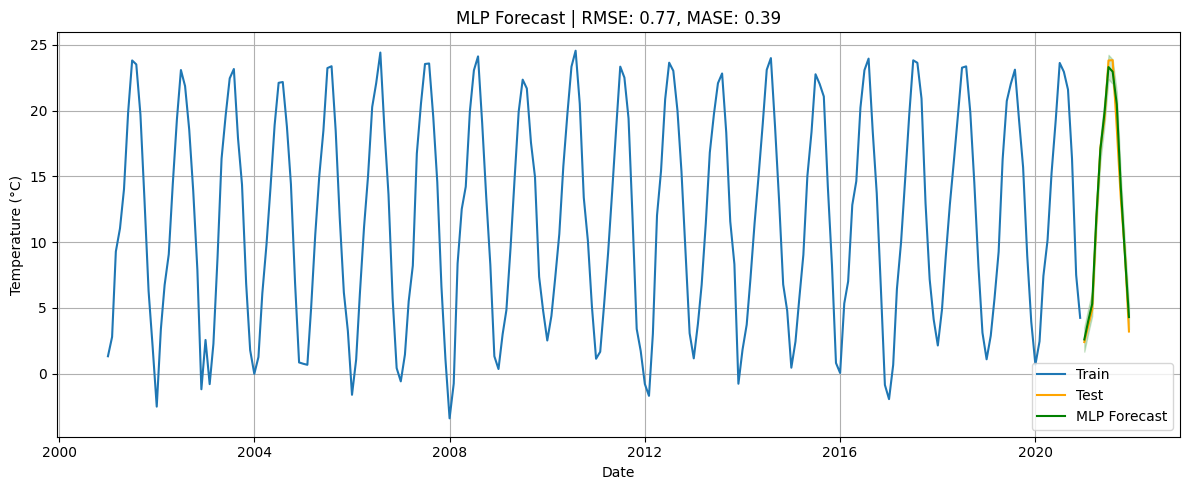

In [ ]:
# Create the model with these parameters
best_mlp_model = MLPRegressor(
    hidden_layer_sizes=best_params_mlp['hidden_layer_sizes'],
    alpha=best_params_mlp['alpha'],
    activation=best_params_mlp['activation'],
    max_iter=1000,
    random_state=42
)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
best_mlp_model.fit(X_train_scaled, y_train)

# Make predictions
mlp_forecast = best_mlp_model.predict(X_test_scaled)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, mlp_forecast))

# MASE calculation
naive_forecast = y_train.shift(12)
mase_denominator = np.mean(np.abs(y_train[12:] - naive_forecast[12:]))
mase = np.mean(np.abs(y_test - mlp_forecast)) / mase_denominator

# Create confidence intervals based on training errors
y_train_pred = best_mlp_model.predict(X_train_scaled)
train_errors = y_train - y_train_pred
error_std = train_errors.std()

# Create confidence intervals (95% CI is roughly 2 standard deviations)
forecast_ci_lower = mlp_forecast - 1.96 * error_std
forecast_ci_upper = mlp_forecast + 1.96 * error_std

# Create a plot
plt.figure(figsize=(12, 5))

# Plot training data
plt.plot(train_ml.index, train_ml[target], label='Train')

# Plot test data
plt.plot(test_ml.index, test_ml[target], label='Test', color='orange')

# Plot forecast
plt.plot(test_ml.index, mlp_forecast, label='MLP Forecast', color='green')

# Plot confidence intervals
plt.fill_between(test_ml.index,
                 forecast_ci_lower,
                 forecast_ci_upper,
                 color='green', alpha=0.2)

plt.title(f'MLP Forecast | RMSE: {rmse:.2f}, MASE: {mase:.2f}')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()